In [10]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
import requests
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [234]:
r = requests.get("https://api.opendota.com/api/proPlayers")
print(r.json()[:1])
pros = pd.DataFrame(r.json())
pros.set_index("account_id",inplace=True)
print(pros)



[{'account_id': 88470, 'steamid': '76561197960354198', 'avatar': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/b9/b92793127bfa6ceb1edbd2b7b25011b1dc6db89e.jpg', 'avatarmedium': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/b9/b92793127bfa6ceb1edbd2b7b25011b1dc6db89e_medium.jpg', 'avatarfull': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/b9/b92793127bfa6ceb1edbd2b7b25011b1dc6db89e_full.jpg', 'profileurl': 'https://steamcommunity.com/id/misterdurst69/', 'personaname': 'Tzy丶', 'last_login': None, 'full_history_time': '2020-02-29T04:12:48.806Z', 'cheese': 0, 'fh_unavailable': False, 'loccountrycode': 'CN', 'last_match_time': '2020-02-29T10:48:25.000Z', 'plus': True, 'name': 'TZY', 'country_code': 'cn', 'fantasy_role': 1, 'team_id': 6020739, 'team_name': '', 'team_tag': '', 'is_locked': False, 'is_pro': True, 'locked_until': None}]
                      steamid  \
account_id                      
88470       7656119796

In [3]:
import time

ds = []
count = 0
skipped = []
for account_id in pros.index:
    #name = goodteams.loc[goodteams['team_id'] == team_id]["tag"]
    #print(name)
    
    #df.loc[df.Letters=='C','Letters'].values[0]
    name = pros.loc[pros.index == account_id].name.item()
    print("Grabbing: {0} Count: {1}".format(name,count))
    r = requests.get("https://api.opendota.com/api/players/{0}/heroes".format(account_id)).json()
    #now we want to convert to the right format
    d = {"account_id":account_id}
    #d = {}
    for i in r:
        try:
            d[i['hero_id']] = i['games']
        except (TypeError, gaierror) as e:
            print("Skipped {0}".format(account_id))
            print(r)
            continue
    ds.append(d)
    time.sleep(5)
    count += 1
    
skippedagain = []
for account_id in skipped:
    #name = goodteams.loc[goodteams['team_id'] == team_id]["tag"]
    #print(name)
    
    #df.loc[df.Letters=='C','Letters'].values[0]
    name = pros.loc[pros.account_id == account_id].name.item()
    print("Grabbing: {0} Count: {1}".format(name,count))
    r = requests.get("https://api.opendota.com/api/players/{0}/heroes".format(account_id)).json()
    #now we want to convert to the right format
    d = {"account_id":account_id}
    #d = {}
    for i in r:
        try:
            d[i['hero_id']] = i['games']
        except (TypeError, gaierror) as e:
            print("Skipped {0}".format(account_id))
            print(r)
            skippedagain.append(account_id)
            continue
    ds.append(d)
    time.sleep(10)
    count += 1
    

C:\Users\5cent\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: `item` has been deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()


Grabbing: TZY Count: 0
Grabbing: Newsham Count: 1
Grabbing: EGM Count: 2
Grabbing: March Count: 3
Grabbing: syndereN Count: 4
Grabbing: fn Count: 5
Grabbing: solen Count: 6
Grabbing: davy Count: 7
Grabbing: pieliedie Count: 8
Grabbing: Durp Durp Count: 9
Grabbing: Trixi Count: 10
Grabbing: yamich Count: 11
Grabbing: Sneyking Count: 12
Grabbing: uu Count: 13
Grabbing: VANSKOR Count: 14
Grabbing: Nix Count: 15
Grabbing: LIMMP Count: 16
Grabbing: xiaofeng Count: 17
Grabbing: PAADA Count: 18
Grabbing: Socks Count: 19
Grabbing: Yaki Count: 20
Grabbing: Handsken Count: 21
Grabbing: Sasquatch Count: 22
Grabbing: Kummisetä Count: 23
Grabbing: N0tail Count: 24
Grabbing: Bamboe Count: 25
Grabbing: ^Cechi Count: 26
Grabbing: Black^ Count: 27
Grabbing: `whiteBeard Count: 28
Grabbing: HoviteY Count: 29
Grabbing: NoiA Count: 30
Grabbing: Buugi Count: 31
Grabbing: Niqua Count: 32
Grabbing: Cr1t- Count: 33
Grabbing: IllidanSTR Count: 34
Grabbing: kacor Count: 35
Grabbing: JerAx Count: 36
Grabbing: Sky

Grabbing: DkPhobos Count: 292
Grabbing: boris Count: 293
Grabbing: xxxBliNcc Count: 294
Grabbing: Chalice Count: 295
Grabbing: Marc Count: 296
Grabbing: Nine Count: 297
Grabbing: Masoku Count: 298
Grabbing: Jenkins Count: 299
Grabbing: Madara Count: 300
Grabbing: RoD Count: 301
Grabbing: MNZ Count: 302
Grabbing: Ar1se Count: 303
Grabbing: naive- Count: 304
Grabbing: Kelen Count: 305
Grabbing: 633 Count: 306
Grabbing: . Count: 307
Grabbing: SKYLINE Count: 308
Grabbing: Stormstormer Count: 309
Grabbing: Rayuur Count: 310
Grabbing: aikster Count: 311
Grabbing: DK Count: 312
Grabbing: Ace Count: 313
Grabbing: MahhxD Count: 314
Grabbing: darkesthj Count: 315
Grabbing: GOD Count: 316
Grabbing: Panthera Count: 317
Grabbing: dnzshkA Count: 318
Grabbing: MiLAN Count: 319
Grabbing: ocean Count: 320
Grabbing: Escaper Count: 321
Grabbing: xiao8 Count: 322
Grabbing: ksani Count: 323
Grabbing: SmAsh- Count: 324
Grabbing: pwN Count: 325
Grabbing: Tigger Count: 326
Grabbing: OroYperfume Count: 327
Gra

Grabbing: Sexyfat Count: 586
Grabbing: SabeRLighT- Count: 587
Grabbing: Gunnar Count: 588
Grabbing: 2hoi Count: 589
Grabbing: Efking Count: 590
Grabbing: TrazaM Count: 591
Grabbing: AhJit Count: 592
Grabbing: Szabo666 Count: 593
Grabbing: Datbb Count: 594
Grabbing: Boomy Count: 595
Grabbing: young G Count: 596
Grabbing: Fishman Count: 597
Grabbing: Crystallis Count: 598
Grabbing: ADSWRKSC Count: 599
Grabbing: Mydearest Count: 600
Grabbing:   Count: 601
Grabbing: Rico Count: 602
Grabbing: eine Count: 603
Grabbing: Slander Count: 604
Grabbing: Aventador Count: 605
Grabbing: Vivian Xù Count: 606
Grabbing: Wolfgang Count: 607
Grabbing: 寻虐 Count: 608
Grabbing: R Count: 609
Grabbing: Xxs Count: 610
Grabbing: 2huang.2day Count: 611
Grabbing: ♥♥♥♥♥♥ Count: 612
Grabbing: FakeFish Count: 613
Grabbing: Agressif Count: 614
Grabbing: nongrata` Count: 615
Grabbing: RAI Count: 616
Grabbing: 4nalog~  Count: 617
Grabbing: SaintDeLucaz Count: 618
Grabbing: Mandy Count: 619
Grabbing: Protoss Count: 620
G

Grabbing: ZaTta Count: 881
Grabbing: Astral Count: 882
Grabbing: kxy- Count: 883
Grabbing: 绵绵 Count: 884
Grabbing: lowkez Count: 885
Grabbing: Corey Count: 886
Grabbing: o Count: 887
Grabbing: Red Count: 888
Grabbing: FACEHUGGER Count: 889
Grabbing: Dust Count: 890
Grabbing: Kevin Count: 891
Grabbing: 66 Count: 892
Grabbing: Shirley Count: 893
Grabbing: Stay Count: 894
Grabbing: FLYSOLO Count: 895
Grabbing: qAzer Count: 896
Grabbing: Emo Count: 897
Grabbing: Malik Count: 898
Grabbing: B7 NexT LeveL Count: 899
Grabbing: Arnab- Count: 900
Grabbing: SangSang Count: 901
Grabbing: Henry Count: 902
Grabbing: OpGod Count: 903
Grabbing: Yasy Count: 904
Grabbing: Virsatus Count: 905
Grabbing: BoBoKa Count: 906
Grabbing: SeeL Count: 907
Grabbing: . Count: 908
Grabbing: adzantick Count: 909
Grabbing: Kalkbrenner- Count: 910
Grabbing: Fonte Count: 911
Grabbing:      Count: 912
Grabbing: abingYb Count: 913
Grabbing: 沫， Count: 914
Grabbing: asdasdasd Count: 915
Grabbing: 灼连胜 Count: 916
Grabbing: 10G

In [247]:
r = requests.get("https://api.opendota.com/api/proPlayers")
#print(r.json()[:1])
pros = pd.DataFrame(r.json())
pros.set_index("account_id",inplace=True)
#print(pros)


In [248]:
#print(ds[:10])
proheroes = pd.DataFrame(ds)
proheroes.fillna(0,inplace=True)
proheroes.set_index("account_id",inplace=True)
heropros = proheroes.T
heropros = heropros.div(heropros.sum(axis=1), axis=0)
print(heropros.index)
heropros.index = pd.to_numeric(heropros.index)
heropros.sort_index(inplace=True)
print(heropros.index)

proheroes = proheroes.div(proheroes.sum(axis=1), axis=0)
proheroes = proheroes[pros.fantasy_role != 0]
pros = pros[pros.fantasy_role != 0]
proheroes = proheroes[pros.fantasy_role != 3]
pros = pros[pros.fantasy_role != 3]


print(proheroes)
print(heropros)


Index(['14', '2', '69', '73', '41', '93', '62', '88', '120', '8',
       ...
       '113', '85', '121', '66', '50', '91', '82', '61', '126', '92'],
      dtype='object', length=119)
Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            111, 112, 113, 114, 119, 120, 121, 126, 128, 129],
           dtype='int64', length=119)
                  14         2        69        73        41        93  \
account_id                                                               
88470       0.048078  0.045003  0.038015  0.035360  0.034102  0.032984   
1296625     0.043680  0.006607  0.010278  0.005384  0.006240  0.008320   
3916428     0.007457  0.002610  0.008203  0.004474  0.003729  0.001119   
3940262     0.002209  0.009177  0.020987  0.019033  0.008412  0.009007   
4281729     0.019260  0.017940  0.005540  0.002462  0.014862  0.003782   
...              ...       ...       ...       ...       ...       ...   
480412663   0.014716  0.005133  0.002396  0.018

In [249]:
proheroes.to_csv('proheroes.csv')
heropros.to_csv('heropros.csv')

In [250]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(proheroes)
#embedding.shape


In [251]:
pros.fantasy_role.replace(to_replace=4,value=1,inplace=True)




[<matplotlib.lines.Line2D object at 0x0000016123E36948>, <matplotlib.lines.Line2D object at 0x00000161250A3B08>] ['$\\mathdefault{1}$', '$\\mathdefault{2}$']


Text(0.5, 1.0, 'UMAP projection of hero preferences')

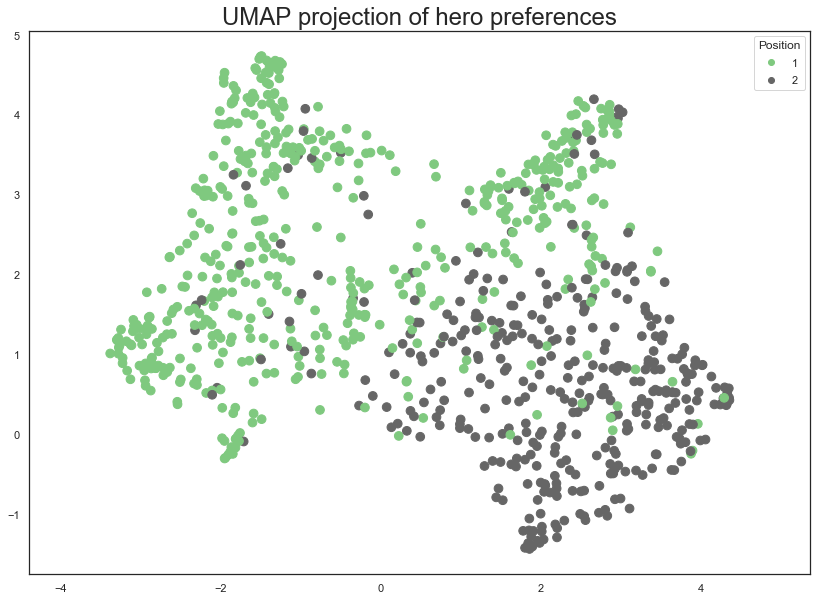

In [252]:
#roles = [x for x in pros.fantasy_role]
#print(roles)
#label = [x for x in pros[:50].fantasy_role]

scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=[x for x in pros.fantasy_role],cmap="Accent",s=75)
print(*scatter.legend_elements())
legend = plt.legend(*scatter.legend_elements(),loc="upper right",title="Position")
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of hero preferences', fontsize=24)


In [253]:
from io import BytesIO
from PIL import Image
import base64

def embeddable_image(data):
    img_data = 255 - 15 * data.astype(np.uint8)
    image = Image.fromarray(img_data, mode='L').resize((64, 64), Image.BICUBIC)
    buffer = BytesIO()
    image.save(buffer, format='png')
    for_encoding = buffer.getvalue()
    return 'data:image/png;base64,' + base64.b64encode(for_encoding).decode()

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral5

output_notebook()

Loading BokehJS ...

In [254]:
embed_df = pd.DataFrame(embedding, columns=('x', 'y'))
embed_df['name'] = [str(x) for x in pros.name]
embed_df['fantasy_role'] = [str(x) for x in pros.fantasy_role]
embed_df['country_code'] = [str(x) for x in pros.country_code]


print(embed_df)

            x         y      name fantasy_role country_code
0    2.054850  2.646543       TZY            1           cn
1    1.182928 -0.029928   Newsham            2             
2    3.276369 -0.505421       EGM            2           se
3    2.955781  2.087924     March            2             
4    3.413738  1.046002  syndereN            2             
..        ...       ...       ...          ...          ...
916 -2.896560  1.465102      gpk~            1             
917  4.296175  0.460487     █ █ █            1             
918 -0.354798  1.665436   b4x4zZz            1           kz
919 -2.161279  1.420086     Ergon            1             
920 -1.429301  4.681956    zipzap            1           mk

[921 rows x 5 columns]


([<matplotlib.lines.Line2D object at 0x0000016123EEC288>, <matplotlib.lines.Line2D object at 0x00000161253FEA88>], ['$\\mathdefault{0}$', '$\\mathdefault{1}$'])


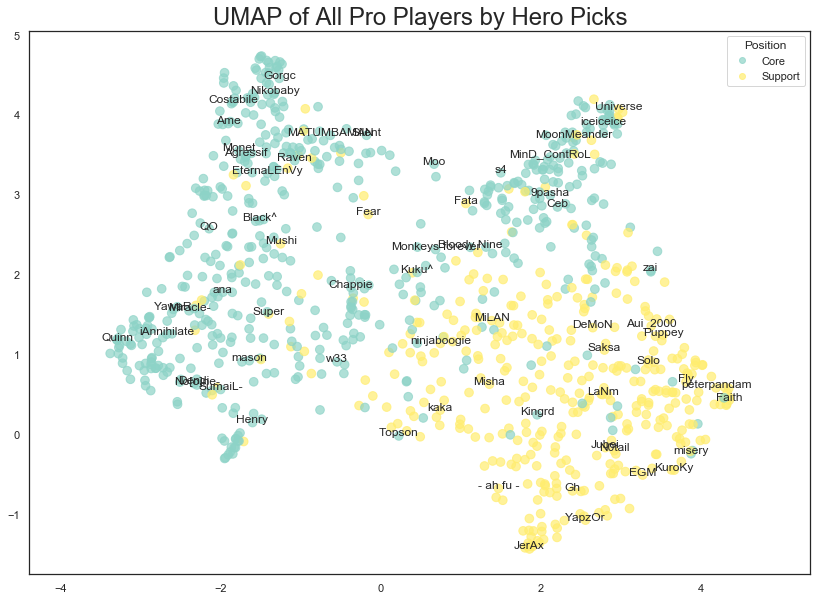

In [255]:
scatter = plt.scatter(embed_df.x, embed_df.y, c=[(int(x)-1) for x in embed_df.fantasy_role],cmap="Set3",s=75,alpha=0.7)
print(scatter.legend_elements())
handles, labels = scatter.legend_elements()
legend = plt.legend(handles, ['Core','Support'], loc="upper right", title="Position")


#legend = plt.legend(['Core','Support'],loc="upper right",title="Position")
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP of All Pro Players by Hero Picks', fontsize=24)

tolabel = ['KuroKy','peterpandam','Jubei','Costabile', 'SumaiL-', 'Ame','Agressif','Monet','YawaR','No[o]ne-','Dendi','Henry',
           'Topson','Fear','Mushi','Moo','MoonMeander','Universe','iceiceice','MinD_ContRoL','zai','Aui_2000','Puppey','Gh','JerAx',
           'YapzOr','Bloody Nine','mason','Quinn','iAnnihilate','Miracle-','Kuku^','DeMoN','Kingrd','Gorgc','Silent','MATUMBAMAN',
          'Fly','N0tail','kaka','MiLAN','ninjaboogie','Black^','QO','Monkeys-forever','Misha','Saksa','w33','9pasha','Ceb','- ah fu -',
          'Super','Chappie','Fata','ana','Faith','misery','EGM','Nikobaby','Solo','Raven','LaNm','s4','EternaLEnVy']


for n in tolabel:
    row = embed_df[embed_df['name'] == n]
    #print(row)
    #print(row.x.values)
    
    label = n
    point = (row.x.values[0],row.y.values[0])

    plt.annotate(label, # this is the text
                 point, # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


In [256]:
datasource = ColumnDataSource(embed_df)
color_mapping = CategoricalColorMapper(factors=[str(x) for x in range(5)],
                                       palette=Spectral5) 

plot_figure = figure(
    title='UMAP projection of hero preferences',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <span style='font-size: 16px; color: #224499'>Name:</span>
        <span style='font-size: 18px'>@name</span>
        <span style='font-size: 18px'>@country_code</span>        
    </div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='fantasy_role', transform=color_mapping),
    line_alpha=0.6,
    fill_alpha=0.6,
    size=12
)

print(plot_figure)

show(plot_figure)

Figure(id='3237', ...)


In [299]:
reducer = umap.UMAP()
embeddingT = reducer.fit_transform(heropros)
#embedding.shape


In [300]:
#https://api.opendota.com/api/heroes
    
r = requests.get("https://api.opendota.com/api/heroes")
print(r.json()[:1])
heroes = pd.DataFrame(r.json())
heroes.set_index("id",inplace=True)
print(heroes)
print(heropros)

[{'id': 1, 'name': 'npc_dota_hero_antimage', 'localized_name': 'Anti-Mage', 'primary_attr': 'agi', 'attack_type': 'Melee', 'roles': ['Carry', 'Escape', 'Nuker'], 'legs': 2}]
                             name  localized_name primary_attr attack_type  \
id                                                                           
1          npc_dota_hero_antimage       Anti-Mage          agi       Melee   
2               npc_dota_hero_axe             Axe          str       Melee   
3              npc_dota_hero_bane            Bane          int      Ranged   
4       npc_dota_hero_bloodseeker     Bloodseeker          agi       Melee   
5    npc_dota_hero_crystal_maiden  Crystal Maiden          int      Ranged   
..                            ...             ...          ...         ...   
120       npc_dota_hero_pangolier       Pangolier          agi       Melee   
121      npc_dota_hero_grimstroke      Grimstroke          int      Ranged   
126     npc_dota_hero_void_spirit     Void Spi

In [301]:
embedT_df = pd.DataFrame(embeddingT, columns=('x', 'y'))
embedT_df['localized_name'] = [str(x) for x in heroes.localized_name]
embedT_df['primary_attr'] = [str(x) for x in heroes.primary_attr]
embedT_df['roles'] = [str(x) for x in heroes.roles]
embedT_df['attack_type '] = [str(x) for x in heroes.attack_type ]
embedT_df['legs'] = [str(x) for x in heroes.legs]

([<matplotlib.lines.Line2D object at 0x0000016123FA50C8>, <matplotlib.lines.Line2D object at 0x000001612311F488>, <matplotlib.lines.Line2D object at 0x0000016123FA5AC8>], ['$\\mathdefault{1}$', '$\\mathdefault{2}$', '$\\mathdefault{3}$'])


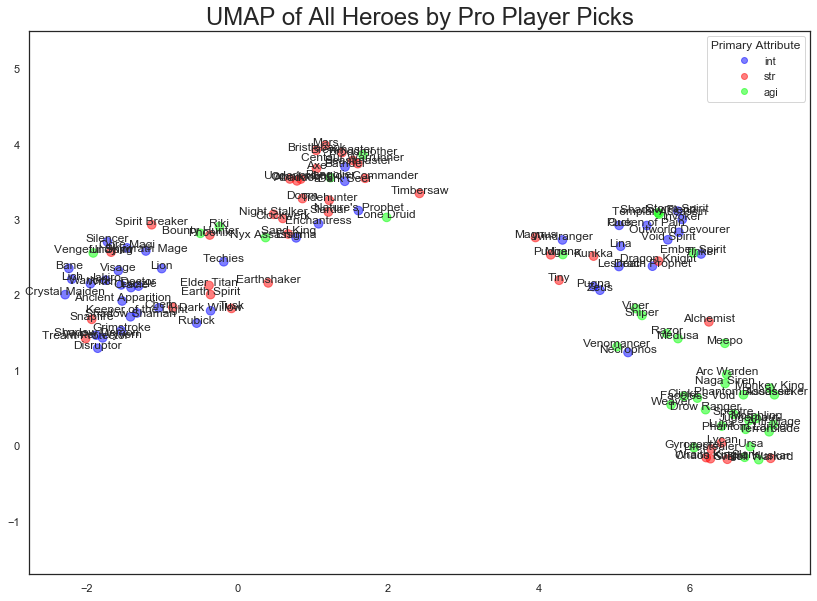

In [302]:
attr = {'str':2,'agi':3,'int':1}

scatter = plt.scatter(embedT_df.x, embedT_df.y, c=[attr[x] for x in embedT_df.primary_attr],cmap="brg",s=75,alpha=0.5)
print(scatter.legend_elements())
handles, labels = scatter.legend_elements()
legend = plt.legend(handles, ['int','str','agi'], loc="upper right", title="Primary Attribute")


#legend = plt.legend(['Core','Support'],loc="upper right",title="Position")
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP of All Heroes by Pro Player Picks', fontsize=24)

for index, row in embedT_df.iterrows():
    
    label = row.localized_name
    point = (row.x,row.y)

    plt.annotate(label, # this is the text
                 point, # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
